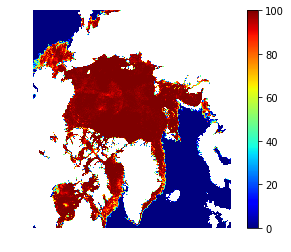

<Figure size 1440x1440 with 0 Axes>

In [2]:
#PART 1

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

data = np.load('C:\\Users\\seacr\\Desktop\\Germany\\2018WS\\Python\\ice_data\\20080415.npy')
#print(data)

#print(data.ndim)

fig, ax = plt.subplots()
img = ax.imshow(data, cmap=plt.cm.jet, origin='lower') #cmap=plt.cm.jet option
cbar = fig.colorbar(img)

#plt.imshow(data, cmap=plt.cm.gist_heat, origin='lower')#heating map option
plt.axis('off')
plt.figure(figsize=(20,20))
plt.savefig('question_1.png')
plt.show()


['20060115.npy', '20060201.npy', '20060215.npy', '20060301.npy', '20060315.npy'] [2006, 2006, 2006, 2006, 2006] [1, 2, 2, 3, 3] [15, 1, 15, 1, 15] [2006.123287671233, 2006.1671232876713, 2006.2054794520548, 2006.2493150684932, 2006.2876712328766]


C:\Users\seacr\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater


[85632, 86794, 87547, 87075, 87772]


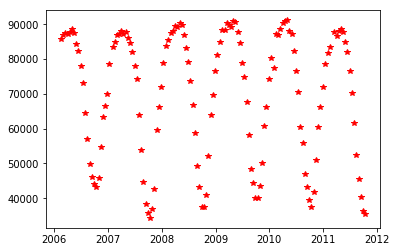

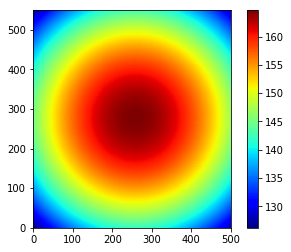

<Figure size 1440x1440 with 0 Axes>

C:\Users\seacr\Anaconda3\lib\site-packages\ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in greater_equal


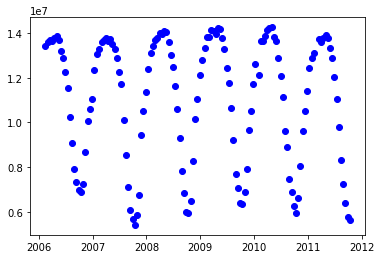

In [5]:
#PART2
import glob
import os
from PIL import Image

cd = 'C:\\Users\\seacr\\Desktop\\Germany\\2018WS\\Python\\ice_data' #current directory
#print(cd)
os.chdir(cd) #setting the directory as above file path
    
file_list  = glob.glob('*.npy') #getting all the names of the map files
    
year_list = [] #creating a list of years
month_list = [] #creating a list of months
day_list = [] #creating a list of days
time_list = [] #creating a list of times    

for name in file_list:
        
    name = name.split('.')[0] #only retrieving the name of the file and removing the file extension
        
    year = int(name[0:4])#retrieving year
    year_list.append(year) 
        
    month = int(name[4:6])#retrieving month
    month_list.append(month) 
        
    day = int(name[6:8])#retrieving day
    day_list.append(day) 
    #print(name, year, month, day) #checking
        
    frac = (month * 30 + day) / 365 #calculating the fraction in years
    time = year + frac #retrieving the time
    time_list.append(time)
    
print(file_list[:5], year_list[:5], month_list[:5], day_list[:5], time_list[:5])

pixel_list=list()#creating a list which contains total number of pixels which exceeds 0.5 in each map
for file in file_list:
    #print(file) #checking
    
    file = cd +"\\" + file #getting the whole file directory
    map_file = np.load(file) #getting the map_data
    
    count = 0 #number of pixels which would exceed 0.5
    
    #*******************************************************************************************
    #the inefficient version but no errormessage************************************************
    #*******************************************************************************************
    #for row in map_file: #each row
    #    for value in row: #each value
    #        if math.isnan(value)==False: #checking whether it is a missing value
    #            if value>0.5: #checking whether it exceeds 0.5
    #                count +=1    
    
    #pixel_list.append(count)
    #print(count)
#*******************************************************************************************
#*******************************************************************************************
#*******************************************************************************************
    map_file = map_file[map_file>0.5] #retreiving only the values which exceeds 0.5
    count, = np.shape(map_file)
    pixel_list.append(count)
print(pixel_list[:5])
#print(len(pixel_list))

#plotting the number of pixels which exceed 0.5 over time
plt.plot(time_list, pixel_list, marker = '*' , color = 'red' , linewidth = 0)
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.show() #showing the graph
#the grapsh shows a seasonal pattern! During summer the number of pixels which exceed 0.5 reaches its maximum during the year
#and it reaches its yearly minimum when it is winter


ice_data = 'C:\\Users\\seacr\\Desktop\\Germany\\2018WS\\Python\\ice_data_area.npy' #reading in ice_data
ice_data = np.load(ice_data)
#print(ice_data)
figure, ax = plt.subplots()
img = ax.imshow(ice_data, cmap=plt.cm.jet, origin='lower')
figure.colorbar(img)

plt.figure(figsize=[20, 20])
plt.show() #showing the graph

area_list=[]
for file in file_list:
    ice_data = 'C:\\Users\\seacr\\Desktop\\Germany\\2018WS\\Python\\ice_data_area.npy' #reading in ice_data
    ice_data = np.load(ice_data)
    file = cd +"\\" + file #getting the whole file directory
    map_file = np.load(file) #getting the map_data
    condition = map_file>=0.99 #retrieving an array of true or false which tells us whether the pixel is equal or greater than 0.99
    ice_data = ice_data[condition] #getting only the area which are equal or greater than 0.99
    area = np.sum(ice_data) #getting the toal sum of ice_data
    area_list.append(area) #appending to area_list

plt.plot(time_list, area_list, marker = 'o' , color = 'blue' , linewidth = 0) #plotting the graph of total area against time
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.show() #showing the graph

#the graph shows slightly downward trend in case of the minimum values of total area over time.
#However, note that the minimum values of total area seems to increase between 2008 and 2010

2007.7808219178082
2007 9 15
20070915.npy
20060915.npy


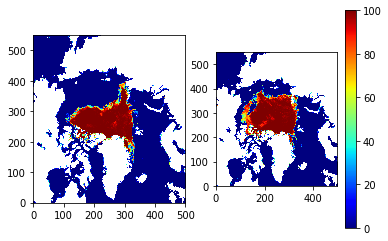

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>



The difference between 2006 & 2007


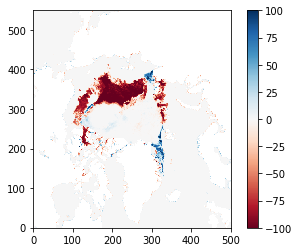

In [6]:
#PART3
min_val = min(area_list) #getting the minimum value
#print(min_val)
idx = area_list.index(min_val) #getting the index of minimum value

the_time = time_list[idx] #the time where the minimum value occurred
print(the_time)

the_year = year_list[idx] #getting year
the_month = month_list[idx] #getting month
the_day = day_list[idx] #getting day
print(the_year, the_month, the_day)

#map of minimum value
file_name= "{year:04d}{month:02d}{day:02d}.npy".format(year = the_year, month = the_month, day = the_day)
print(file_name)
map_file1 = np.load(file_name) #reading the map with lowest minimum value

figure, (ax0, ax1) = plt.subplots(ncols = 2)
img1 = ax0.imshow(map_file1, cmap=plt.cm.jet, origin='lower')
plt.figure(figsize=(20,20))


#map of 2006
og_file = "2006{month:02d}{day:02d}.npy".format( month = the_month, day = the_day) #2006 file with same month and day
print(og_file)
map_file2 = np.load(og_file) #reading the map with lowest minimum value

img2 = ax1.imshow(map_file2, cmap=plt.cm.jet, origin='lower')
figure.colorbar(img2, ax=ax1)
plt.figure(figsize=(20,20))

fig.tight_layout()
plt.show()

#the difference map
print("\n")
print("The difference between 2006 & 2007")
diff = map_file1 - map_file2 #getting the difference between 2006 and 2007
#diff = min -2006
figure, ax = plt.subplots()
img = ax.imshow(diff, cmap='RdBu', origin='lower')
figure.colorbar(img)
plt.show()



(550, 500)
(550, 500)


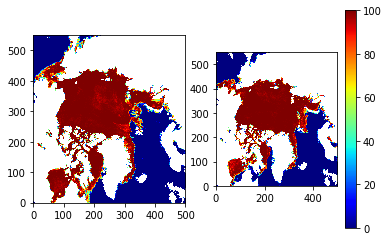

In [7]:
#PART 4
count_06=0
count_11=0
map_data06 = np.zeros([550,500])
map_data11 = np.zeros([550,500])

for year in year_list:

    if year==2006:
        idx = year_list.index(year)
        count_06 += 1
        file = file_list[idx]
        file = cd +"\\" + file #getting the whole file directory
        map_file = np.load(file) #getting the map_data
        map_data06 += map_file
    
    elif year==2011:
        idx = year_list.index(year)
        count_11 += 1
        file = file_list[idx]
        file = cd +"\\" + file #getting the whole file directory
        map_file = np.load(file) #getting the map_data
        map_data11 += map_file
avg_map06 = map_data06 / count_06
avg_map11 = map_data11 / count_11

#print(np.shape(avg_map06))
#print(np.shape(avg_map11))

figure, (ax0, ax1) = plt.subplots(ncols=2)
img1 = ax0.imshow(avg_map06, cmap=plt.cm.jet, origin='lower')



img2 = ax1.imshow(avg_map11, cmap=plt.cm.jet, origin='lower')
figure.colorbar(img2)
fig.tight_layout()
plt.show()

